# 프로젝트 설명

- 이번 프로젝트의 목적은 자동차 데이터를 활용하여 회귀에 대한 이해도를 높이고 높은 R2점수를 획득하는 것에 있습니다.
- 자동차의 가격, 주행거리, 연료 타입 등을 바탕으로 여러가지 분석을 진행해 볼 수 있습니다.
- 회귀 분석은 데이터 세트의 변수 간 관계를 발견하는 방법입니다. 특히 예측과 관련하여 광범위한 문제를 해결하기 위해 많이 사용하게 됩니다.


# 데이터 설명
www.cardekho.com 웹사이트에서 수집된 자동차에 대한 데이터입니다.

* Car_Name : 자동차의 이름 
* Year : 자동차 구매연도
* Selling_Price : 첫 판매 가격
* Present_Price : 현재 가격
* Kms_Driven : 주행 거리
* Fuel_Type : 연료 타입 (petrol / disel / CNG / LPG / electric)
* Seller_Type : 판매자 타입 (Indivisual / Dealer)
* Transmission : 기어 변속기 (Automatic / Manual)
* Owner : 소유자 변경 횟수 (First Owner / Second Owner / Third Owner / Fourth & Above Owner)

## 데이터 불러오기

In [ ]:
## 상품 수령울 위한 이름과 연락처를 주석으로 입력해주세요.
## 이름 : 김동욱
## 연락처 : jayk01213@naver.com

In [41]:
from sklearn.linear_model import LinearRegression## 필요한 패키지를 import 해 보세요.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [37]:
## 주어진 파일명을 활용하여 데이터를 불러와 할당해 보세요. (car data.csv)
data = pd.read_csv('car data.csv')



In [7]:
## 데이터의 형태와 결측치 등을 확인해 보세요.
print(data.shape)

print(data.isnull().sum())

print(data.head())

print(data.describe())



(301, 9)
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean  

## 탐색적 데이터 분석(EDA)
데이터를 시각화 하며 탐색해 보겠습니다.

<AxesSubplot:>

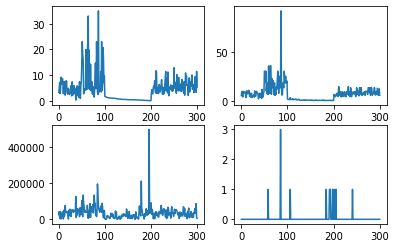

In [38]:
## 각각의 변수에 대해 시각화를 통해 특성을 파악해 보세요.

fig, axes = plt.subplots(nrows=2, ncols=2)

data['Selling_Price'].plot(ax=axes[0,0])
data['Present_Price'].plot(ax=axes[0,1])
data['Kms_Driven'].plot(ax=axes[1,0])
data['Owner'].plot(ax=axes[1,1])

In [39]:
## 범주형 변수를 수치형 변수로 변환해 보세요
data['Car_Name'] = pd.factorize(data['Car_Name'])[0]
data['Fuel_Type'] = pd.factorize(data['Fuel_Type'])[0]
data['Seller_Type'] = pd.factorize(data['Seller_Type'])[0]
data['Transmission'] = pd.factorize(data['Transmission'])[0]
data['Owner'] = pd.factorize(data['Owner'])[0]

print(data)



     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0           0  2014           3.35           5.59       27000          0   
1           1  2013           4.75           9.54       43000          1   
2           2  2017           7.25           9.85        6900          0   
3           3  2011           2.85           4.15        5200          0   
4           4  2014           4.60           6.87       42450          1   
..        ...   ...            ...            ...         ...        ...   
296        94  2016           9.50          11.60       33988          1   
297        95  2015           4.00           5.90       60000          0   
298        94  2009           3.35          11.00       87934          0   
299        94  2017          11.50          12.50        9000          1   
300        95  2016           5.30           5.90        5464          0   

     Seller_Type  Transmission  Owner  
0              0             0      0  
1      

In [21]:
## 데이터 셋의 상관관계를 시각화하여 확인해 보세요.
data.corr()





,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,1.000000,0.093863,-0.102556,-0.174656,-0.088554,-0.219397,-0.049010,-0.115201,0.051011
Year,0.093863,1.000000,0.236141,-0.047584,-0.524342,0.053643,-0.039896,-0.000394,-0.171232
Selling_Price,-0.102556,0.236141,1.000000,0.878983,0.029187,0.509467,-0.550724,0.367128,-0.096487
Present_Price,-0.174656,-0.047584,0.878983,1.000000,0.203647,0.440415,-0.512030,0.348715,-0.019838
Kms_Driven,-0.088554,-0.524342,0.029187,0.203647,1.000000,0.166801,-0.101419,0.162510,0.061766
Fuel_Type,-0.219397,0.053643,0.509467,0.440415,0.166801,1.000000,-0.352415,0.080466,-0.057210
Seller_Type,-0.049010,-0.039896,-0.550724,-0.512030,-0.101419,-0.352415,1.000000,-0.063240,0.123854
Transmission,-0.115201,-0.000394,0.367128,0.348715,0.162510,0.080466,-0.063240,1.000000,0.018716
Owner,0.051011,-0.171232,-0.096487,-0.019838,0.061766,-0.057210,0.123854,0.018716,1.000000


## 모델링

In [40]:
## 데이터를 스케일링 하고 트레인 셋과 테스트 셋으로 나누어 보세요.
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(data[['Selling_Price','Present_Price','Kms_Driven']].to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[[
  'Selling_Price','Present_Price','Kms_Driven']])
data[['Selling_Price','Present_Price','Kms_Driven']] = df_scaled[['Selling_Price','Present_Price','Kms_Driven']]


#data split
X = data

X_train, X_test = train_test_split(X, test_size = 0.25, random_state = 99)
print(data)
print(len(X_train))


     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0           0  2014      -0.258416      -0.236215   -0.256224          0   
1           1  2013       0.017481       0.221505    0.155911          1   
2           2  2017       0.510154       0.257427   -0.773969          0   
3           3  2011      -0.356950      -0.403079   -0.817758          0   
4           4  2014      -0.012079      -0.087890    0.141743          1   
..        ...   ...            ...            ...         ...        ...   
296        94  2016       0.953559       0.460214   -0.076225          1   
297        95  2015      -0.130321      -0.200292    0.593804          0   
298        94  2009      -0.258416       0.390687    1.313340          0   
299        94  2017       1.347698       0.564504   -0.719876          1   
300        95  2016       0.125869      -0.200292   -0.810958          0   

     Seller_Type  Transmission  Owner  
0              0             0      0  
1      

In [61]:
## 선형 회귀 모델을 통해 여러가지 변수들의 관계를 파악해 보세요.

model = LinearRegression()

model.fit(X_train[['Selling_Price']], X_train[['Present_Price']])
pred1 = model.predict(X_test[['Selling_Price']])

model.fit(X_train[['Selling_Price']], X_train[['Fuel_Type']])
pred2 = model.predict(X_test[['Selling_Price']])

model.fit(X_train[['Kms_Driven']], X_train[['Kms_Driven']])
pred3 = model.predict(X_test[['Kms_Driven']])


In [62]:
## 모델을 평가하고 해석해 보세요.
print("Sell price : Present Price r2 score: ",r2_score(pred1, X_test[['Present_Price']]))  # high corr, high r2 score
print("Sell price : Fuel Type r2 score: ",r2_score(pred2, X_test[['Fuel_Type']])) # properly high corr, but low r2 because data isnt linear, more logistic
print("Kms_Driven : Kms_Driven r2 score: ",r2_score(pred3, X_test[['Kms_Driven']])) # A:A linear regression, 1 corr => 1 r2 score





Sell price : Present Price r2 score:  0.8020285705215339
Sell price : Fuel Type r2 score:  -1.882284674911658
Kms_Driven : Kms_Driven r2 score:  1.0
